### 1. Loading and Preprocessing

In [13]:
from sklearn.datasets import load_iris
import pandas as pd

# Load and preprocess the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### 2.Clustering Algorithm Implementation

#### A) KMeans Clustering

KMeans is an unsupervised learning algorithm used to partition a dataset into K distinct, non-overlapping clusters. The goal is to group similar data points together and discover underlying patterns.

**<u>How it works:</u>**

* Choose the number of clusters K.
* Randomly initialize K cluster centroids.
* Assign each data point to the nearest centroid.
* Update centroids as the mean of all points assigned to that cluster.
* Repeat steps 3–4 until centroids do not change significantly (convergence).

The Iris dataset has 150 samples with 4 numeric features (sepal/petal length and width). Although it's labeled (with 3 species), we can use clustering to see if KMeans can identify natural groupings without using the labels.

It is a classic dataset with 3 distinct clusters (ideal for K=3).

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


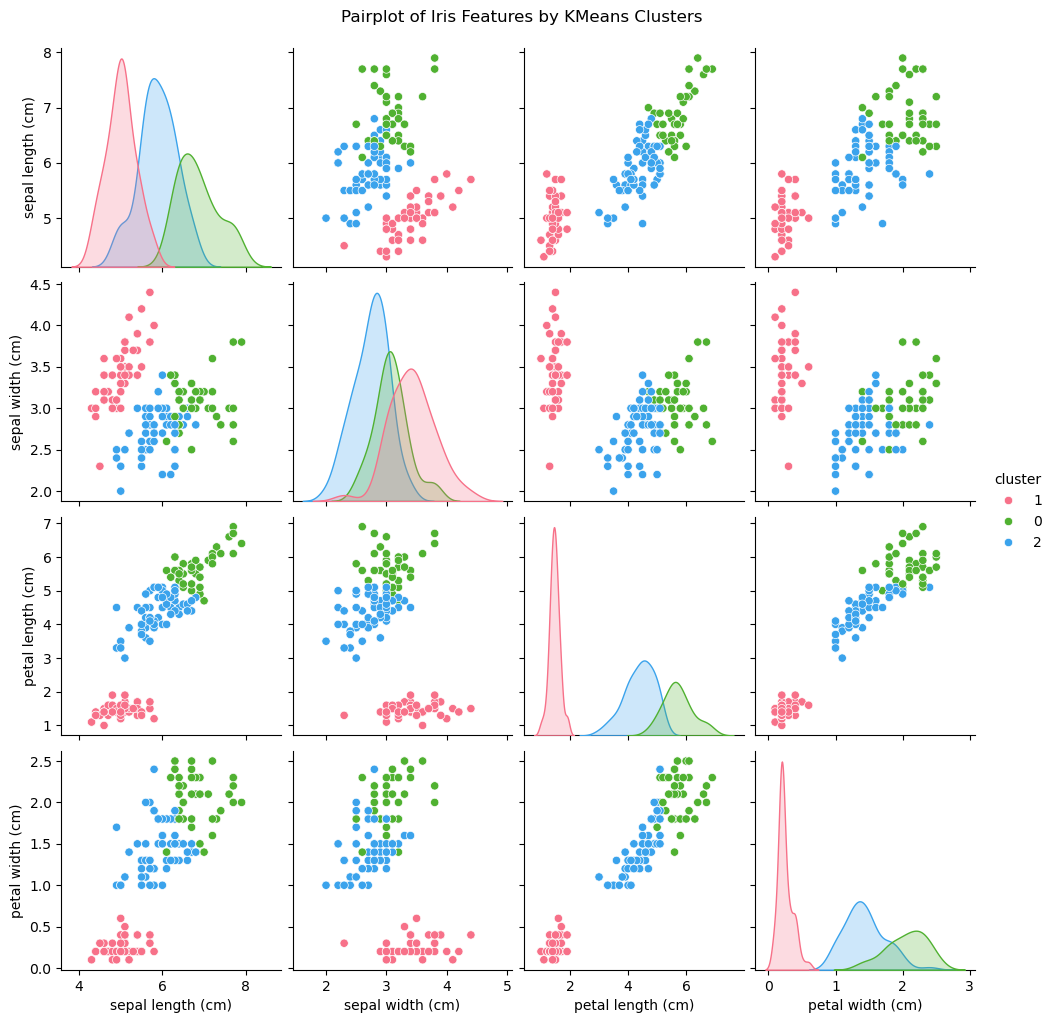

In [60]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

df['cluster'] = df['cluster'].astype(str)  # Convert to string for better legend handling
sns.pairplot(df, hue='cluster', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Iris Features by KMeans Clusters', y=1.02)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22304\2058023093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=df, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22304\2058023093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=df, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22304\2058023093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=df, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22304\2

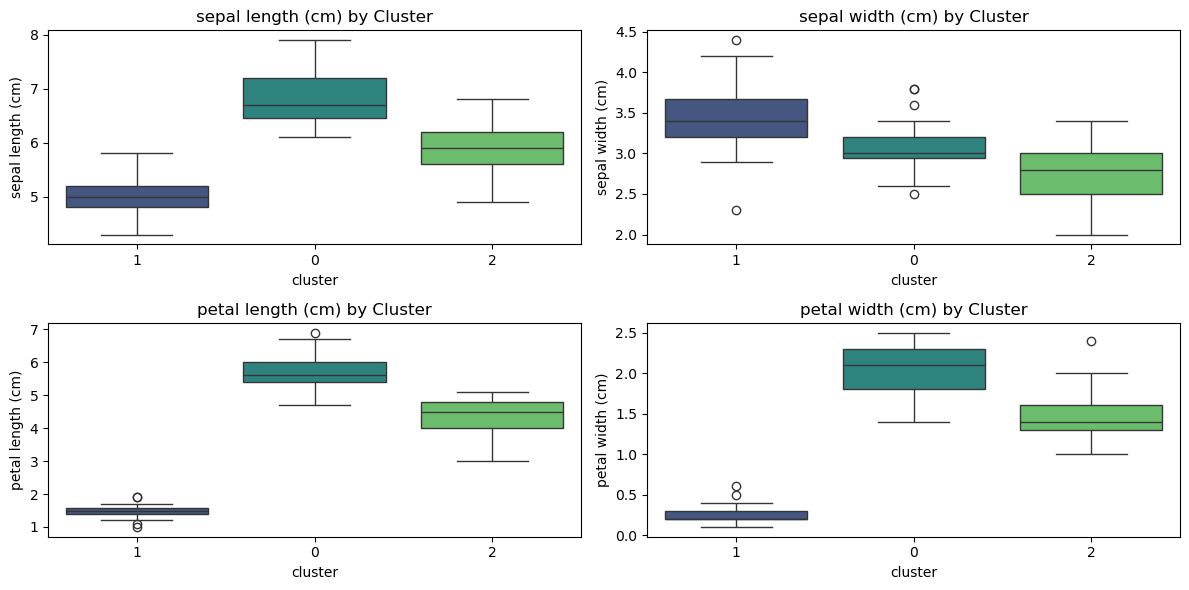

In [62]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='cluster', y=column, data=df, palette='viridis')
    plt.title(f'{column} by Cluster')
plt.tight_layout()
plt.show()

#### B) Hierarchical Clustering

Hierarchical Clustering builds a hierarchy of clusters in a bottom-up (agglomerative) or top-down (divisive) fashion. The most common is agglomerative clustering.

**<u>How it works:</u>**
* Start with each data point as its own cluster.
* Merge the two closest clusters based on a distance metric (e.g., Euclidean distance).
* Repeat step 2 until all points are merged into a single cluster.
* The process is visualized with a dendrogram, and clusters are formed by cutting the dendrogram at a certain level.

The Iris dataset has clear natural groupings (3 species). Hierarchical clustering does not require us to pre-specify the number of clusters. It works well on small datasets like Iris (150 samples).

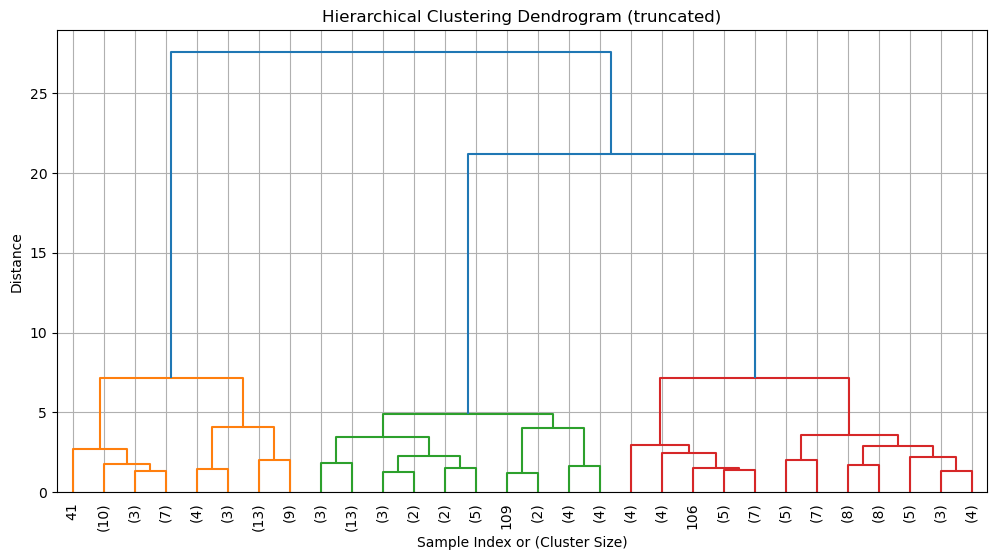

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Standardize the data for better distance computation
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Compute linkage matrix using Ward's method
linkage_matrix = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

A dendrogram to explore how data groups at different levels. It is the true output of hierarchical clustering. It shows the full hierarchy of merges, allowing you to visually decide the number of clusters by choosing a cut-off distance.

It represents the structure of the data in a way scatter plots cannot — including nested or chained clustering relationships.